In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iarunava/cell-images-for-detecting-malaria")

print("Path to dataset files:", path)

100%|██████████| 675M/675M [00:22<00:00, 31.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/iarunava/cell-images-for-detecting-malaria/versions/1


In [6]:
!pip install kaggle


In [7]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [8]:
# Define your desired path
path = "/content/drive/MyDrive/ML_data_set"

# Download and unzip the dataset to the specified path
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria -p "{path}" --unzip

print("Path to dataset files:", path)


Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
100% 674M/675M [00:23<00:00, 33.8MB/s]
100% 675M/675M [00:23<00:00, 30.3MB/s]
Path to dataset files: /content/drive/MyDrive/ML_data_set


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iarunava/cell-images-for-detecting-malaria")

print("Path to dataset files:", path)

In [1]:
!pip install tensorflow numpy matplotlib opencv-python


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import os
import shutil
import random

# Paths
data_dir = 'cell_images'  # Folder with "Parasitized" and "Uninfected" directories
train_dir = 'data/training'
val_dir = 'data/validation'

# Create train and validation directories
for category in ['parasitized', 'uninfected']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

# Function to split data
def split_data(source, training, validation, split_size=0.8):
    files = os.listdir(source)
    random.shuffle(files)
    train_size = int(len(files) * split_size)
    train_files = files[:train_size]
    val_files = files[train_size:]

    for file in train_files:
        shutil.copy(os.path.join(source, file), os.path.join(training, file))

    for file in val_files:
        shutil.copy(os.path.join(source, file), os.path.join(validation, file))

# Split parasitized images
split_data(os.path.join(data_dir, 'Parasitized'), os.path.join(train_dir, 'parasitized'), os.path.join(val_dir, 'parasitized'))

# Split uninfected images
split_data(os.path.join(data_dir, 'Uninfected'), os.path.join(train_dir, 'uninfected'), os.path.join(val_dir, 'uninfected'))


In [12]:
!ls /content/drive/MyDrive/ML_data_set


'archive (33).zip'     heart+disease.zip		     processed.hungarian.data
 ask-detrano	       hungarian.data			     processed.switzerland.data
 bak		       Index				     processed.va.data
 cell_images	       long-beach-va.data		     reprocessed.hungarian.data
 cleveland.data        manufacturing_defect_dataset.csv      switzerland.data
 cleve.mod	      'Melbourne_housing_FULL (2) (1).csv'   Tweets.csv
 costs		       new.data				     WARNING
 heart_disease	      'Online Retail.xlsx'
 heart-disease.names   processed.cleveland.data


In [13]:
import zipfile
import os

def unzip_file(zip_path, extract_to='.'):
    # Check if the file exists
    if not os.path.exists(zip_path):
        print("The specified zip file does not exist.")
        return

    # Extract the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted files to: {extract_to}")

# Usage
zip_path = '/content/drive/MyDrive/ML_data_set/cell_images.zip'
extract_to = '/content/drive/MyDrive/ML_data_set/output_directory'  # Full path for extraction
unzip_file(zip_path, extract_to)


The specified zip file does not exist.


In [16]:
import os
import shutil
import random

# Paths
data_dir = '/content/drive/MyDrive/ML_data_set/cell_images'  # Original dataset folder
train_dir = '/content/drive/MyDrive/ML_data_set/data/training'
val_dir = '/content/drive/MyDrive/ML_data_set/data/validation'

# Categories in the dataset
categories = ['Parasitized', 'Uninfected']

# Create train and validation directories for each category
for category in categories:
    os.makedirs(os.path.join(train_dir, category.lower()), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category.lower()), exist_ok=True)

# Function to split data into training and validation sets
def split_data(source_dir, train_dir, val_dir, split_size=0.8):
    # List all files in the source directory
    files = [file for file in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, file))]

    # Shuffle the files
    random.shuffle(files)

    # Split the files based on the split_size
    train_size = int(len(files) * split_size)
    train_files = files[:train_size]
    val_files = files[train_size:]

    # Copy files to training directory
    for file in train_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(train_dir, file))

    # Copy files to validation directory
    for file in val_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(val_dir, file))

# Split data for each category
for category in categories:
    split_data(
        os.path.join(data_dir, category),
        os.path.join(train_dir, category.lower()),
        os.path.join(val_dir, category.lower())
    )

print("Data split complete. Training and validation directories are set up.")


Data split complete. Training and validation directories are set up.


In [18]:
# Step 1: Install Required Libraries
# !pip install tensorflow numpy matplotlib opencv-python

# Step 2: Import Libraries
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# Step 3: Data Preparation
# Paths
data_dir = '/content/drive/MyDrive/ML_data_set/cell_images'
train_dir = '/content/drive/MyDrive/ML_data_set/data/training'
val_dir = '/content/drive/MyDrive/ML_data_set/data/validation'
categories = ['Parasitized', 'Uninfected']







In [19]:

# Create training and validation directories
for category in categories:
    os.makedirs(os.path.join(train_dir, category.lower()), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category.lower()), exist_ok=True)

# Function to split data into training and validation sets
def split_data(source_dir, train_dir, val_dir, split_size=0.8):
    files = [file for file in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, file))]
    random.shuffle(files)
    train_size = int(len(files) * split_size)
    train_files = files[:train_size]
    val_files = files[train_size:]
    for file in train_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(train_dir, file))
    for file in val_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(val_dir, file))

In [20]:

# Split data for each category
for category in categories:
    split_data(
        os.path.join(data_dir, category),
        os.path.join(train_dir, category.lower()),
        os.path.join(val_dir, category.lower())
    )

print("Data split complete. Training and validation directories are set up.")

# Step 4: Load and Preprocess Data
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Data split complete. Training and validation directories are set up.
Found 26480 images belonging to 2 classes.
Found 9945 images belonging to 2 classes.


In [21]:
# Step 5: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Step 6: Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


828/828 ━━━━━━━━━━━━━━━━━━━━ 499s 595ms/step - accuracy: 0.7320 - loss: 0.5076 - val_accuracy: 0.9514 - val_loss: 0.1713
Epoch 2/10
828/828 ━━━━━━━━━━━━━━━━━━━━ 544s 655ms/step - accuracy: 0.9086 - loss: 0.2592 - val_accuracy: 0.9519 - val_loss: 0.1676
Epoch 3/10
828/828 ━━━━━━━━━━━━━━━━━━━━ 494s 573ms/step - accuracy: 0.9202 - loss: 0.2372 - val_accuracy: 0.9543 - val_loss: 0.1416
Epoch 4/10
828/828 ━━━━━━━━━━━━━━━━━━━━ 476s 572ms/step - accuracy: 0.9252 - loss: 0.2210 - val_accuracy: 0.9558 - val_loss: 0.1413
Epoch 5/10
828/828 ━━━━━━━━━━━━━━━━━━━━ 442s 532ms/step - accuracy: 0.9286 - loss: 0.2126 - val_accuracy: 0.9560 - val_loss: 0.1441
Epoch 6/10
828/828 ━━━━━━━━━━━━━━━━━━━━ 448s 539ms/step - accuracy: 0.9324 - loss: 0.2022 - val_accuracy: 0.9552 - val_loss: 0.1299
Epoch 7/10
828/828 ━━━━━━━━━━━━━━━━━━━━ 454s 546ms/step - accuracy: 0.9322 - loss: 0.1944 - val_accuracy: 0.9547 - val_loss: 0.1398
Epoch 8/10
828/828 ━━━━━━━━━━━━━━━━━━━━ 501s 545ms/step - accuracy: 0.9323 - loss: 0.20

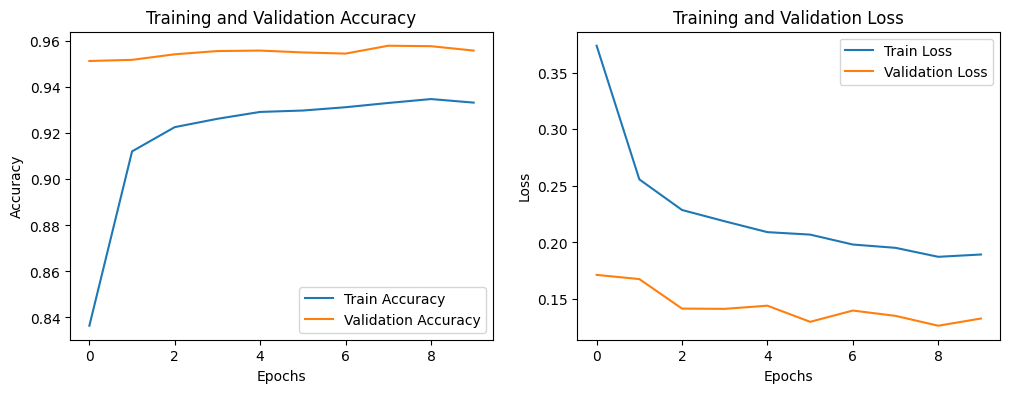

In [24]:

# Step 7: Evaluate the Model
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [26]:
# Step 8: Test the Model on New Images
def predict_malaria(image_path, model):
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    return "Malaria Detected" if prediction[0][0] > 0.5 else "No Malaria Detected"

# Example usage
test_image_path = '/content/drive/MyDrive/ML_data_set/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
print(predict_malaria(test_image_path, model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
Malaria Detected
